##### duration: real-time x 4 (leave one out takes a while...)

In [1]:
%load_ext autoreloa`d
%autoreload 2

In [2]:
from pathlib import Path
import sys
import logging
logging.basicConfig(level=logging.INFO)
print(sys.executable)

/n/groups/datta/tim_sainburg/conda_envs/peromoseq/bin/python3


### Get recording info (google sheets)

In [3]:
import requests
import pandas as pd
from io import BytesIO

In [4]:
# spreadsheet_url = 'https://docs.google.com/spreadsheet/ccc?key=14HIqUaSl_n-91hpAvmACY_iVY9nLKdlA6qklhxfZon0&output=csv&gid=0'
spreadsheet_url = "https://docs.google.com/spreadsheet/ccc?key=1jACsUmxuJ9Une59qmvzZGc1qXezKhKzD1zho2sEfcrU&output=csv&gid=0"
response = requests.get(spreadsheet_url)
recording_df = pd.read_csv(BytesIO(response.content))

In [5]:
recording_df[:3]

,Subject,duration_m,video_recording_id,ephys_id,calibration_id,video_location_on_o2,ephys_location_on_o2,calibration_location_on_o2,samplerate,username,n_ephys_streams,max_video_duration_m,use_local,User
0,M04002,10,24-05-01-13-26-43-110846,2024-05-01_13-26-37,24-05-01-13-45-07-825493,/n/groups/datta/tim_sainburg/datasets/chronic2...,/n/groups/datta/tim_sainburg/datasets/chronic2...,/n/groups/datta/tim_sainburg/datasets/chronic2...,150,tis697,1,10,False,NaN
1,M04003,30,24-05-01-13-51-17-581428,2024-05-01_13-51-09,24-05-01-13-45-07-825493,/n/groups/datta/tim_sainburg/datasets/chronic2...,/n/groups/datta/tim_sainburg/datasets/chronic2...,/n/groups/datta/tim_sainburg/datasets/chronic2...,150,tis697,1,10,False,NaN
2,M04002,30,24-05-01-15-37-07-757018,2024-05-01_15-36-57,24-05-01-13-45-07-825493,/n/groups/datta/tim_sainburg/datasets/chronic2...,/n/groups/datta/tim_sainburg/datasets/chronic2...,/n/groups/datta/tim_sainburg/datasets/chronic2...,150,tis697,1,10,False,NaN


### Run

In [6]:
for idx, recording_row in recording_df.iterrows():
    break

In [7]:
CAMERA_SAMPLERATE = 150
expected_frames_per_video = 90000 # how long video max is (e.g. 10 minutes * 150 frames = 90000)

In [8]:
output_directory = Path("/n/groups/datta/tim_sainburg/datasets/scratch/") / "240806-3d-pipeline"

In [9]:
output_directory

PosixPath('/n/groups/datta/tim_sainburg/datasets/scratch/240806-3d-pipeline')

In [10]:
output_directory_triangulation = output_directory / 'triangulation' / recording_row.video_recording_id
output_directory_triangulation.mkdir(parents=True, exist_ok=True)

In [11]:
from multicamera_airflow_pipeline.tim_240731.keypoints.triangulation import Triangulator 

Python interpreter binary location: /n/groups/datta/tim_sainburg/conda_envs/peromoseq/bin/python3


In [12]:
!ls {output_directory}

2D_predictions	    continuous_features   openephys_sync      triangulation
2D_predictions-2    egocentric_alignment  size_normalization  triangulation2
arena_alignment     gimbal		  spikesorting
camera_calibration  gimbal2		  tensorrt
camera_sync	    gimbal3		  tensorrt-2


In [14]:
!ls {output_directory / 'camera_sync' / '24-05-01-13-26-43-110846'}

camera_sync.csv


In [15]:
!head {output_directory / 'camera_sync' / '24-05-01-13-26-43-110846'/'camera_sync.csv'}

,trigger_times,trigger_states,BackBottom_frames,BackLeft_frames,BackRight_frames,FrontBottom_frames,FrontLeft_frames,FrontRight_frames,datetime_est
0,0.0,0,0,0,0,0,0,0,1714584403.110846
1,6666.0,0,1,1,1,1,1,1,1714584403.117512
2,13332.0,1,2,2,2,2,2,2,1714584403.124178
3,19998.0,1,3,3,3,3,3,3,1714584403.130844
4,26664.0,1,4,4,4,4,4,4,1714584403.13751
5,33330.0,0,5,5,5,5,5,5,1714584403.144176
6,39996.0,0,6,6,6,6,6,6,1714584403.150842
7,46662.0,0,7,7,7,7,7,7,1714584403.157508
8,53328.0,0,8,8,8,8,8,8,1714584403.164174


In [13]:
predictions_2d_directory = output_directory / '2D_predictions'

In [14]:
triangulator = Triangulator(
    predictions_2d_directory = output_directory / '2D_predictions' / recording_row.video_recording_id,
    output_3d_directory = output_directory_triangulation,
    camera_sync_file = output_directory  / 'camera_sync' / recording_row.video_recording_id / 'camera_sync.csv',
    expected_frames_per_video = expected_frames_per_video,
    camera_calibration_directory = output_directory / "camera_calibration" / recording_row.calibration_id / "jarvis"/"CalibrationParameters",
)

In [15]:
triangulator.run()

INFO:multicamera_airflow_pipeline.tim_240731.keypoints.triangulation:	 n_videos_expected 2
INFO:root:	 n_cameras 6
INFO:multicamera_airflow_pipeline.tim_240731.keypoints.triangulation:Creating output files
INFO:multicamera_airflow_pipeline.tim_240731.keypoints.triangulation:Running triangulation over chunks


chunk:   0%|          | 0/2 [00:00<?, ?it/s]

INFO:multicamera_airflow_pipeline.tim_240731.keypoints.triangulation:	Total: Prop 2D keypoints are NaNs: 0.0


camera:   0%|          | 0/6 [00:00<?, ?it/s]

L.O.O. 3D triangulation:   0%|          | 0/44985 [00:00<?, ?it/s]

L.O.O. 3D triangulation:   0%|          | 0/44985 [00:00<?, ?it/s]

L.O.O. 3D triangulation:   0%|          | 0/44985 [00:00<?, ?it/s]

L.O.O. 3D triangulation:   0%|          | 0/44985 [00:00<?, ?it/s]

L.O.O. 3D triangulation:   0%|          | 0/44985 [00:00<?, ?it/s]

L.O.O. 3D triangulation:   0%|          | 0/44985 [00:00<?, ?it/s]

INFO:multicamera_airflow_pipeline.tim_240731.keypoints.triangulation:	Total: Prop 2D keypoints are NaNs: 0.0
INFO:multicamera_airflow_pipeline.tim_240731.keypoints.triangulation:	Total: Prop 2D keypoints are NaNs: 0.0


3D triangulation:   0%|          | 0/90000 [00:00<?, ?it/s]

	Total: Prop 3D keypoints are NaNs: 0.0
	Total: Prop 3D keypoints are NaNs: 0.0
	Total: Prop 3D keypoints are NaNs: 0.0


INFO:multicamera_airflow_pipeline.tim_240731.keypoints.triangulation:	Total: Prop 2D keypoints are NaNs: 0.0


camera:   0%|          | 0/6 [00:00<?, ?it/s]

L.O.O. 3D triangulation:   0%|          | 0/5 [00:00<?, ?it/s]

L.O.O. 3D triangulation:   0%|          | 0/5 [00:00<?, ?it/s]

L.O.O. 3D triangulation:   0%|          | 0/5 [00:00<?, ?it/s]

L.O.O. 3D triangulation:   0%|          | 0/5 [00:00<?, ?it/s]

L.O.O. 3D triangulation:   0%|          | 0/5 [00:00<?, ?it/s]

L.O.O. 3D triangulation:   0%|          | 0/5 [00:00<?, ?it/s]

INFO:multicamera_airflow_pipeline.tim_240731.keypoints.triangulation:	Total: Prop 2D keypoints are NaNs: 0.0
INFO:multicamera_airflow_pipeline.tim_240731.keypoints.triangulation:	Total: Prop 2D keypoints are NaNs: 0.0


3D triangulation:   0%|          | 0/9 [00:00<?, ?it/s]

	Total: Prop 3D keypoints are NaNs: 0.0
	Total: Prop 3D keypoints are NaNs: 0.0
	Total: Prop 3D keypoints are NaNs: 0.0


INFO:multicamera_airflow_pipeline.tim_240731.keypoints.triangulation:Saving triangulations


In [16]:
!ls -lht {output_directory_triangulation}

total 241M
-rw-r--r-- 1 tis697 NEUROBIO_DattaLab  52M Aug  6 12:45 reprojection_errors.float32.90009x6x25.mmap
-rw-r--r-- 1 tis697 NEUROBIO_DattaLab 8.6M Aug  6 12:45 confidences_3d.float32.90009x25.mmap
-rw-r--r-- 1 tis697 NEUROBIO_DattaLab  26M Aug  6 12:45 predictions_3d.float32.90009x25x3.mmap
-rw-r--r-- 1 tis697 NEUROBIO_DattaLab  52M Aug  6 12:45 confidences_2d.float32.90009x6x25.mmap
-rw-r--r-- 1 tis697 NEUROBIO_DattaLab 104M Aug  6 12:45 predictions_2d.float32.90009x6x25x2.mmap
-rw-r--r-- 1 tis697 NEUROBIO_DattaLab   23 Aug  6 12:45 triangulation_completed.log
-rw-r--r-- 1 tis697 NEUROBIO_DattaLab  19K Aug  6 12:45 triangulation_sample_1.jpg
-rw-r--r-- 1 tis697 NEUROBIO_DattaLab  24K Aug  6 12:45 reprojection_errors_1.jpg
-rw-r--r-- 1 tis697 NEUROBIO_DattaLab  17K Aug  6 12:45 triangulation_sample_0.jpg
-rw-r--r-- 1 tis697 NEUROBIO_DattaLab  26K Aug  6 12:45 reprojection_errors_0.jpg


In [17]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

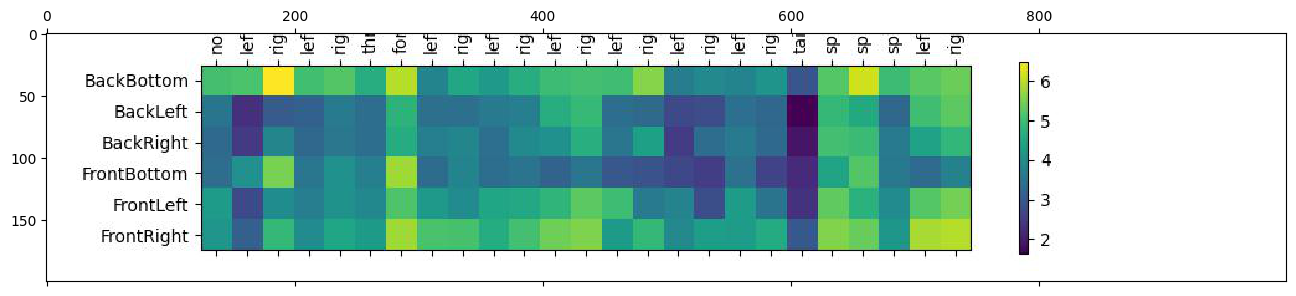

In [20]:
img = mpimg.imread(output_directory_triangulation/ 'reprojection_errors_0.jpg')
plt.matshow(img)

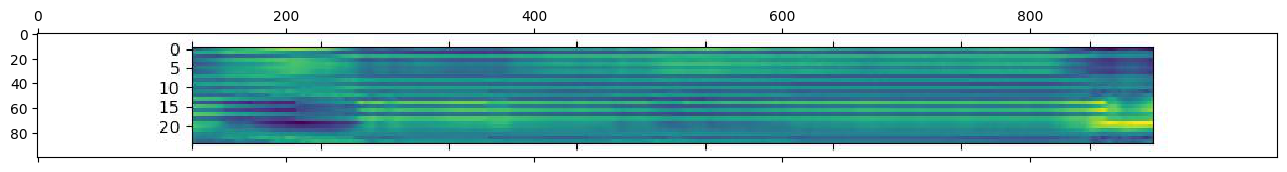

In [21]:
img = mpimg.imread(output_directory_triangulation/ 'triangulation_sample_0.jpg')
plt.matshow(img)